# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0383 Самара Роман. Вариант №65

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

***Диада*** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

***Цензус диад*** $-$ тройка чисел $M, A, N$, где:
$M = \sum_{i<j} X_{ij} X_{ji}$, 

$A = X_{++} - 2M$, 

$N = C^2_g - A - M$

***Виды диад:***

Взаимная диада - $D_i,_j = (1,1) $

Ассиметричная диада - $ D_i,_j = (1,0), D_i,_j = (0,1) $

Нулевая диада - $ D_i,_j = (0,0) $

***Индекс взаимности Каца-Пауэлла*** $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

*   Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

*   Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

*   Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

***Для фиксированного выбора из $d$ акторов:***

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

***Для свободного выбора:***

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

***Индекс взаимности Бандиопадхьяйя*** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

***Вычисление доверительного интервала для оценки P.***

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

*Доверительный интервал:* $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Загрузка необходимых библиотек

In [2]:
if(!require('igraph')) install.packages('igraph')
if(!require('statnet')) install.packages('statnet')
library('igraph')  
library('statnet')

1) С помощью библиотеки igraph смоделировать случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами. Входные данные: $g = 80, p = 0.70$.

In [51]:
#  Константы
g <- 80
p <- 0.70

In [52]:
set.seed(999)
graph <- erdos.renyi.game(g, p, "gnp", directed = TRUE)
net <- network(as_adjacency_matrix(graph), directed = TRUE)

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



В данном задании используется вариант $\mathscr{G}(g, p)$, в которой граф строится путём случайного добавления рёбер, то есть каждая пара из  вершин с вероятностью  соединяется ребром (пары упорядочены, так как ребра направленные). Соответственно по мере роста параметра $p$ от 0 к 1 модель включает с большей вероятностью графы с большим числом рёбер. Вероятность построить граф с $g$ узлами и $M$ рёбрами равна:

$p^M (1-p)^{C^2_n - M}$.



2) Отобразим полученный орграф.

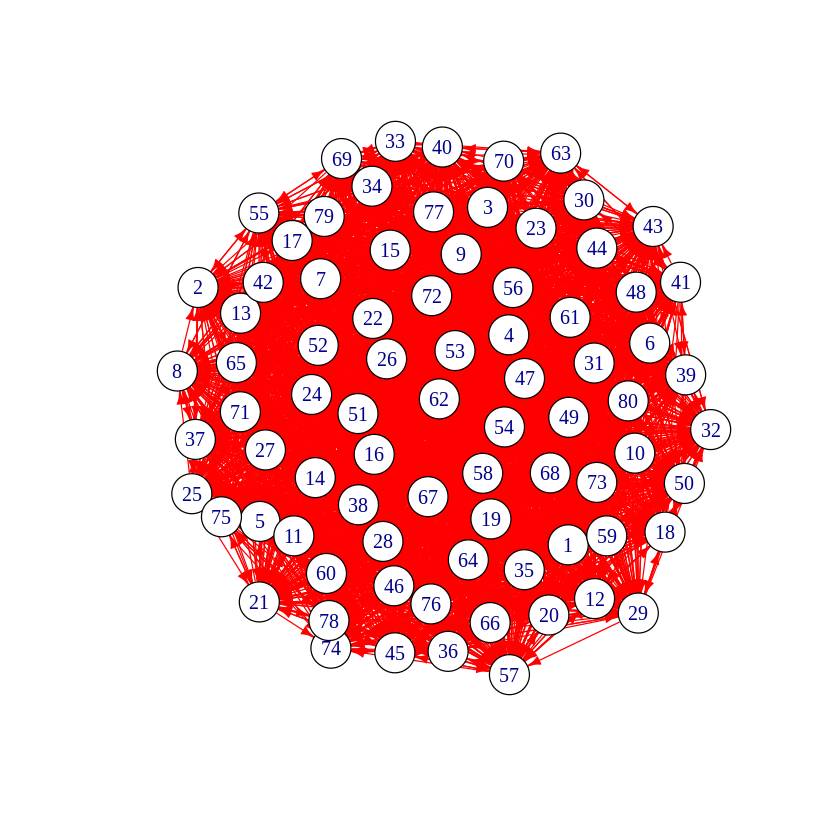

In [53]:
plot(graph, layout = layout_with_fr, vertex.label = V(graph)$name, vertex.size = 15, edge.arrow.size=.5, edge.arrow.color = "pink",  vertex.color= "white", edge.color = "red")

3) Вычислим пятичисловую сводку сети для данного графа.

In [54]:
cat("Размер: ", network.size(net), "\n")
cat("Плотность: ", gden(net), "\n")
cat("Число компонент: ", components(net), "\n")
cat("Диаметр: ", diameter(graph), "\n")
cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")

Размер:  80 
Плотность:  0.6862342 
Число компонент:  1 
Диаметр:  2 
Коэффициент кластеризации:  0.6868291 


4) Вычислим цензус диад для данной модели. 

In [55]:
census <- dyad_census(graph)
census

$mut
[1] 1465

$asym
[1] 1407

$null
[1] 288

Вывод:

Число взаимных диад $M$ равно 1465.

Число ассиметричных диад $A$ равно 1407.

Число пар акторов $N$, между которыми нет связи, равно 288.

Число взаимных и асимметричных диад больше всего, и они примерно равны.

5) Вычислим оценку индекса взаимности Каца-Пауэла при фиксированом количестве выборов 𝑑.

Пусть $d = g/2 = 40$. Каждый актор делает выбор из $(g - 1) = 80 - 1 = 79$ акторов.

При фиксированном выборе:

In [56]:
# При фиксированном выборе
d <- 40
rho_fixed <- (2*(g-1) * census$mut - g * d * d)/(g*d*(g - 1 - d))
cat("При фиксированном выборе: ", rho_fixed)

При фиксированном выборе:  0.8290865

При свободном выборе:

In [57]:
# При свободном выборе
matr <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(matr))
L2 <- sum(rowSums(matr)^2)
rho_free <- (2 * (g - 1)^2 * census$mut - L^2 + L2) / (L * (g - 1)^2 - L^2 + L2)
cat("При свободном выборе: ", rho_free)

При свободном выборе:  -0.03377774

Вывод: При фиксированном выборе акторы более склонны образовывать взаимные связи, а при свободном выборе акторы склонны образовывать односторонние связи или не образовывать их вообще.

6) Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [58]:
P_fixed <- (d / (g - 1)) * ((d / (g - 1)) + rho_fixed * (g - 1 - d) / (g - 1))
cat("Вероятность для фиксированного выбора = ", P_fixed)

Вероятность для фиксированного выбора =  0.4636076

In [59]:
P_free <- (rowSums(matr) * colSums(matr)) / (g - 1)^2
P_free_avg <- sum(P_free) / g
cat("Вероятность для свободного выбора = ", P_free_avg)

Вероятность для свободного выбора =  0.4706678

7) Вычислим индекс взаимности Бандиопадхьяйя.

In [73]:
# Индекс взаимности Бандиопадхьяйя
v_1 <- c() 
v_2 <- c()
for(x in 0:g){
    s <- 0
    if (x>0) {
        for(i in 1:x) { s <- s + sum(matr[i, ])}
    }
    f_t <- s - x*(g - 1) - choose(x, 2)
    v_1 <- append(v_1, f_t)
    s2 <- 0
    if (x + 1 <= g){
        for(i in (x + 1):g) { s2 <- s2 + min(x, sum(matr[i, ]))}
    }
    g_t <- s - x*(x-1) - s2
    v_2 <- append(v_2, g_t)
}
P_B <- (census$mut - max(v_1))/(floor(0.5*(sum(matr) - max(v_2))) - max(v_1))
cat("Индекс взаимности:", P_B)

Индекс взаимности: 0.675738

Вывод: полученный индекс примерно равен $p = 0.70$.

8) Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1), \frac{1}{2})$ при уровне значимости $\alpha = 0.04$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [76]:
alpha <- 0.04
l <- sum(matr)
binom.test(l, g*(g-1), p = 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 4337, number of trials = 6320, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6746310 0.6976653
sample estimates:
probability of success 
             0.6862342 


Вывод: p-value сильно меньше $\alpha$, значит, нулевая гипотеза не выполняется, и вероятность "успеха" (построения ребра между любыми двумя акторами) $p$ не равна 0.5. p-value является максимальным уровнем значимости, при котором гипотеза не отвергается:

p-value $< 2.2 \cdot 10^{-16}$.

9) Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.65$ при уровне значимости $\alpha = 0.04$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [83]:
P0 <- 0.65
binom.test(l, g*(g - 1), p = P0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 4337, number of trials = 6320, p-value =
1.189e-09
alternative hypothesis: true probability of success is not equal to 0.65
95 percent confidence interval:
 0.6746310 0.6976653
sample estimates:
probability of success 
             0.6862342 


Вывод: p-value сильно меньше $\alpha$, значит, нулевая гипотеза не выполняется, как и в прошлом пункте.

p-value $= 1.189 \cdot 10^{-9}$.

10) Построим доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1 - \alpha)$.

In [95]:
est <- (sum(matr))/(g*(g-1))
est
laplace <- 0.5 - (alpha/2)
cat("Лаплас: ", laplace)

[1] 0.6862342

Лаплас:  0.48

Воспользуемся таблицей значений функции Лапласа и получим $z_{\alpha/2} \approx 2.06$.

In [96]:
z_a <- 2.06

p_lower <- est - z_a * sqrt((est * (1 - est))/(g * (g - 1)))
p_upper <- est + z_a * sqrt((est * (1 - est))/(g * (g - 1)))                      
cat('[', p_lower, ',', p_upper, ']')     

[ 0.6742102 , 0.6982581 ]

Получаем доверительный интервал $0.67 \leqslant p \leqslant 0.70$. Зная, что $p = 0.70$, можем сделать вывод, что доверительный интервал вычислен верно с доверительной надёжностью $(1 - \alpha)$.

## Выводы

В ходе данной практической работы провели статистический анализ случайно смоделированного ориентированного графа с использованием библиотек igraph,  statnet и встроенных функций языка R. Данный граф был отображен, для него была вычислена пятичисловая сводка, цензус диад, индексы Каца—Пауэла и Бандиопадхьяйя. Проверена корректность посчитанных значений - большинство из них примерно равно входному значению $p$. 